#### Importing the modules required

In [1]:
#importing required modules
import sys
import json
import numpy as np
import pandas
from random import shuffle

#### Loading the dataset

In [2]:
dataset_path = "C:/Users/dhani/OneDrive/Desktop/BTP/Project Code/datasets/dataset_100ms.json"

with open(dataset_path) as dataset_file:
    dataset = json.loads(dataset_file.read())

#### EDA

In [3]:
len(dataset["events"]["PAPI_L3_TCM"]["mysqld_node"]["data"])
type(dataset["events"]["PAPI_L3_TCM"]["mysqld_node"]["data"])
len(dataset["events"]["PAPI_L3_TCM"])

33

#### Preprocessing The Dataset

In [4]:
data = []
labels = []

In [5]:
data_TCM = []
for process_type in dataset["events"]["PAPI_L3_TCM"]:
    temp = dataset["events"]["PAPI_L3_TCM"][process_type]["data"]
    Sum = sum(temp)
    data_TCM.append(Sum/len(temp)/2)


data_TCA = []
for process_type in dataset["events"]["PAPI_L3_TCA"]:
    temp = dataset["events"]["PAPI_L3_TCA"][process_type]["data"]
    Sum = sum(temp)
    data_TCA.append(Sum/len(temp)/2)


data_INS = []
for process_type in dataset["events"]["PAPI_TOT_INS"]:
    temp = dataset["events"]["PAPI_TOT_INS"][process_type]["data"]
    Sum = sum(temp)
    data_INS.append(Sum/len(temp)/2)

for process_type in dataset["events"]["PAPI_L3_TCM"]:
    labels.append(dataset["events"]["PAPI_L3_TCM"][process_type]["label"])



# data_TCM = []
# for process_type in dataset["events"]["PAPI_L3_TCM"]:
#     temp = dataset["events"]["PAPI_L3_TCM"][process_type]["data"]
#     Sum = sum(temp)
#     data_TCM.append(Sum)


# data_TCA = []
# for process_type in dataset["events"]["PAPI_L3_TCA"]:
#     temp = dataset["events"]["PAPI_L3_TCA"][process_type]["data"]
#     Sum = sum(temp)
#     data_TCA.append(Sum)


# data_INS = []
# for process_type in dataset["events"]["PAPI_TOT_INS"]:
#     temp = dataset["events"]["PAPI_TOT_INS"][process_type]["data"]
#     Sum = sum(temp)
#     data_INS.append(Sum)

# for process_type in dataset["events"]["PAPI_L3_TCM"]:
#     labels.append(dataset["events"]["PAPI_L3_TCM"][process_type]["label"])


In [6]:
data_TCM
data_TCA
data_INS

[76.37604690117253,
 0.0,
 6034433.729480737,
 23877490.076214407,
 19307.038525963148,
 0.0,
 14809.588777219431,
 27367.071189279734,
 20231.69179229481,
 13301.526800670017,
 72022.01340033501,
 16119.665829145728,
 348.22780569514237,
 32792.44891122278,
 23880793.853433836,
 8629039.850987433,
 480976131.8931553,
 6047013.425709516,
 223260019.81671348,
 459000312.8137931,
 2202905.192821369,
 3100037.99081803,
 0.0,
 0.0,
 31248089.91736227,
 0.0,
 31488280.66360601,
 3.6502504173622703,
 113508735.64548495,
 31.892976588628763,
 570895996.6641667,
 52115339.48495575,
 2978683.779632721]

In [7]:
for i in range(0,len(data_TCA)):
    data.append([data_TCM[i],data_TCA[i],data_INS[i]])

In [8]:
data
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0]

#### Normalising the Data

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

(array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

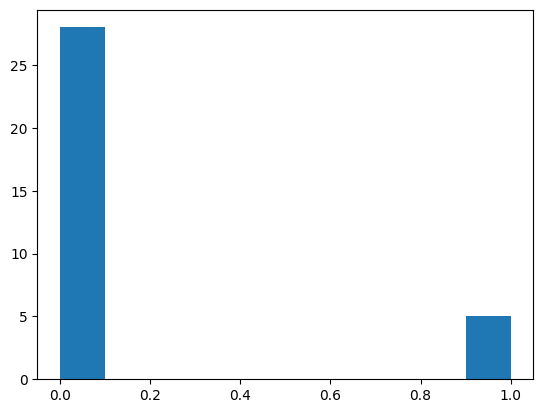

In [10]:
plt.hist(labels)

In [11]:
Data = np.array(data)
Data

array([[4.00887772e+01, 6.31298157e+01, 7.63760469e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.28785653e+04, 3.61230728e+05, 6.03443373e+06],
       [2.43688204e+05, 1.42407881e+06, 2.38774901e+07],
       [5.58897487e+03, 9.41129481e+03, 1.93070385e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.75742630e+03, 4.80982915e+03, 1.48095888e+04],
       [3.15196650e+03, 8.71576214e+03, 2.73670712e+04],
       [2.38018593e+03, 6.48474037e+03, 2.02316918e+04],
       [1.55275796e+03, 4.18727638e+03, 1.33015268e+04],
       [8.24624372e+03, 2.31415352e+04, 7.20220134e+04],
       [1.89187102e+03, 5.20834003e+03, 1.61196658e+04],
       [5.69212730e+01, 9.94237856e+01, 3.48227806e+02],
       [3.72050335e+03, 1.06315017e+04, 3.27924489e+04],
       [2.44709043e+05, 1.41604846e+06, 2.38807939e+07],
       [8.68707280e+04, 6.45272357e+05, 8.62903985e+06],
       [7.71762104e+02, 8.35036728e+02, 4.80976132e+08],
       [5.07079132e+04, 3.50457

In [12]:
shuffled_data = []
shuffled_labels = []

indexes = list(range(len(data)))
shuffle(indexes)

for index in indexes:
    shuffled_data.append(data[index])
    shuffled_labels.append(labels[index])

Data = shuffled_data
labels = shuffled_labels

In [13]:
Scaled_data = StandardScaler().fit_transform(Data)
Scaled_data

array([[-0.0988318 ,  0.0753398 , -0.25843714],
       [-0.45752794, -0.41730946, -0.42104162],
       [-0.45680354, -0.41686627, -0.42101359],
       [-0.46033446, -0.41911785, -0.42115146],
       [-0.46025002, -0.41908333, -0.42114909],
       [ 0.12028834, -0.24233737, -0.06600893],
       [-0.23530338, -0.2769361 , -0.4000261 ],
       [ 0.42224841, -0.1685539 , -0.40085308],
       [ 0.49720207,  0.32192515, -0.20657303],
       [-0.46033446, -0.41911785, -0.42115146],
       [ 1.27370196,  4.91255305,  1.1002649 ],
       [-0.45918958, -0.41882792,  2.85648399],
       [-0.4603207 , -0.41911243, -0.42115125],
       [-0.45772738, -0.41744782, -0.42105054],
       [-0.4602481 , -0.41909455, -0.42115144],
       [-0.46027499, -0.41909594, -0.42115094],
       [-0.33146487, -0.19507137, -0.36234845],
       [-0.36705638, -0.29369411, -0.38002952],
       [-0.3851111 , -0.29743486, -0.37994379],
       [-0.09731742,  0.07255156, -0.25841462],
       [-0.46033446, -0.41911785, -0.421

#### XGBoost Model Creation

In [14]:
#Splitting the Data to Training and testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(Scaled_data),np.array(labels), test_size=0.3, random_state=42,shuffle=False)

In [15]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [16]:
# fit model training data
model_xgb = XGBClassifier(gamma=0.15)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.15, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
# make predictions for test data
predictions_xgb = model_xgb.predict(X_test)
predictions_xgb = [round(value) for value in predictions_xgb]

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [19]:
print("Accuracy is : ",end="")
print(accuracy_score(y_test, predictions_xgb))

print("F1-Score is : ",end="")
print(f1_score(y_test, predictions_xgb,average='weighted'))

print("Recall is : ",end="")
print(recall_score(y_test, predictions_xgb,average='weighted'))

print("Precision is : ",end="")
print(precision_score(y_test, predictions_xgb, average='weighted',zero_division=1))

print("Mean Squared Error : ",end="")
print(mean_squared_error(y_test, predictions_xgb, squared=False))

Accuracy is : 0.8
F1-Score is : 0.7111111111111111
Recall is : 0.8
Precision is : 0.8400000000000001
Mean Squared Error : 0.4472135954999579


In [20]:
print("F1-Score is : ",end="")
print(f1_score(y_test, predictions_xgb,average='weighted'))

F1-Score is : 0.7111111111111111


In [21]:
recall_score(y_test, predictions_xgb, average='weighted')

0.8

In [22]:
precision_score(y_test, predictions_xgb, average='weighted')

C:\Users\dhani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.64

In [23]:
cf_matrix = confusion_matrix(y_test, predictions_xgb)
cf_matrix

array([[8, 0],
       [2, 0]], dtype=int64)

<Axes: >

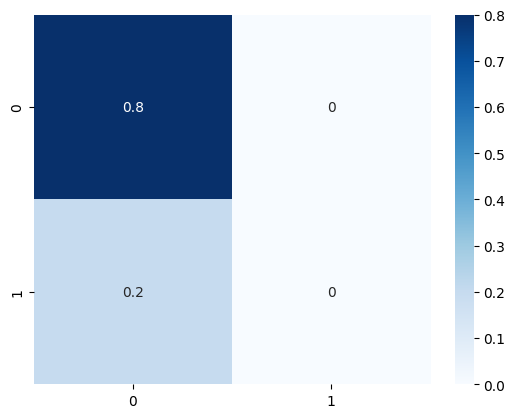

In [24]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')

In [25]:
import pickle

In [26]:
pickle.dump(model_xgb, open('model_xgb.pkl','wb'))